/Users/leochen/Developer/senior-design/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(1, 640, 640, 3)


/Users/leochen/Developer/senior-design/.venv/lib/python3.11/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
{'boxes': array([[[ 1.67784500e+02,  3.84343567e+02,  1.20260483e+02,
          1.19980988e+02],
        [ 6.39245148e+01, -3.99937592e+01,  1.19769333e+02,
          1.20287354e+02],
        [ 2.15810303e+02,  4.16078369e+02,  1.20082458e+02,
          1.20004517e+02],
        [-1.60961761e+01,  5.44071289e+02,  1.19828598e+02,
          1.20081482e+02],
        [ 3.20864143e+01,  3.60088013e+02,  1.19766815e+02,
          1.19970886e+02],
        [ 1.44124069e+02,  1.43886063e+02,  1.19689468e+02,
          1.20034836e+02],
        [ 5.19986206e+02,  2.48054382e+02,  1.20262878e+02,
          1.19976685e+02],
        [ 3.43516785e+02,  2.71914001e+02,  1.20355042e+02,
          1.19938995e+02],
        [ 5.68258667e+02,  3.52030579e+02,  1.19832764e+02,
          1.20032379e+02],
        [ 3.91937317e+02,  8.00406570e+01,  1.19924072e+02,
          1.20151299e+02],
        [ 3.75632477e+02,  4.15871490e+02,  1.20884247e+02,
          1.20230865e+02

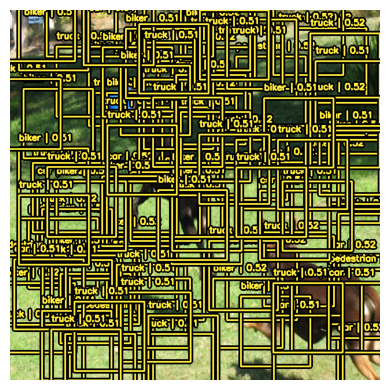

In [1]:
import keras
import keras_cv
import tensorflow as tf

model = keras_cv.models.YOLOV8Detector(
    backbone=keras_cv.models.YOLOV8Backbone.from_preset(
        'yolo_v8_l_backbone_coco'),
    num_classes=5,
    bounding_box_format='XYWH',
    fpn_depth=2,
    # label_encoder=None,
    # prediction_decoder=None,
)

images = keras.utils.load_img(
    path='test.jpg',
    color_mode='rgb',
    target_size=None,
    interpolation='nearest',
    keep_aspect_ratio=False,
)

images = keras.utils.img_to_array(images)
images = keras.layers.Resizing(640, 640)(images)
images = keras.ops.reshape(x=images, newshape=(1, *images.shape))
print(images.shape)


predictions: dict = model.predict(images)
print(predictions)
print(keras.ops.shape(predictions['boxes']))

class_ids = [
    "car",
    "pedestrian",
    "trafficLight",
    "biker",
    "truck",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

y_pred = model.predict(images)
# y_pred = keras_cv.bounding_box.to_ragged(y_pred)
keras_cv.visualization.plot_bounding_box_gallery(
    images,
    value_range=(0, 255),
    bounding_box_format='XYWH',
    y_true=None,
    y_pred=y_pred,
    scale=4,
    rows=1,
    cols=1,
    show=True,
    font_scale=0.5,
    class_mapping=class_mapping,
)